## 1. Load Dataset

In [5]:
import pandas as pd

file_path = '/content/covertype/covtype.data'
column_names = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
] + [f'Wilderness_Area_{i}' for i in range(4)] \
  + [f'Soil_Type_{i}' for i in range(40)] + ['Cover_Type']
df = pd.read_csv(file_path, header=None, names=column_names)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0.0,0.0,0.0,0.0,5.0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0.0,0.0,0.0,0.0,5.0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0.0,0.0,0.0,0.0,5.0


In [6]:
display(df.head())
df.info()
display(df.describe())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0.0,0.0,0.0,0.0,5.0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0.0,0.0,0.0,0.0,5.0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0.0,0.0,0.0,0.0,5.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227137 entries, 0 to 227136
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           227137 non-null  int64  
 1   Aspect                              227137 non-null  int64  
 2   Slope                               227137 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    227137 non-null  int64  
 4   Vertical_Distance_To_Hydrology      227137 non-null  int64  
 5   Horizontal_Distance_To_Roadways     227137 non-null  int64  
 6   Hillshade_9am                       227137 non-null  int64  
 7   Hillshade_Noon                      227137 non-null  int64  
 8   Hillshade_3pm                       227137 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  227137 non-null  int64  
 10  Wilderness_Area_0                   227137 non-null  int64  
 11  Wilderness_Area_1         

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
count,227137.000000,227137.000000,227137.000000,227137.000000,227137.000000,227137.000000,227137.000000,227137.000000,227137.000000,227137.000000,...,227137.000000,227137.000000,227137.000000,227137.000000,227137.000000,227136.000000,227136.000000,227136.000000,227136.000000,227136.000000
mean,2936.166802,140.254490,11.736903,243.558130,34.339289,3325.086939,216.700467,224.238931,140.012437,2596.520118,...,0.009153,0.016461,0.000097,0.000462,0.000044,0.000150,0.018117,0.010949,0.005041,1.903740
std,220.869912,109.878424,6.582304,185.536681,44.013482,1732.479573,21.638900,16.884270,32.602533,1605.011710,...,0.095233,0.127242,0.009841,0.021496,0.006635,0.012234,0.133374,0.104065,0.070821,1.020535
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2802.000000,52.000000,7.000000,95.000000,5.000000,1766.000000,207.000000,216.000000,121.000000,1423.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2959.000000,103.000000,11.000000,210.000000,22.000000,3429.000000,221.000000,227.000000,140.000000,2259.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3086.000000,231.000000,15.000000,351.000000,50.000000,4795.000000,232.000000,235.000000,160.000000,3417.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3849.000000,360.000000,64.000000,1343.000000,601.000000,7117.000000,254.000000,254.000000,248.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## Step 2: Data Cleaning & Preprocessing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop rows with NaN in the target variable
df_cleaned = df.dropna(subset=['Cover_Type'])

X = df_cleaned.drop('Cover_Type', axis=1)
y = df_cleaned['Cover_Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (181708, 54), Test shape: (45428, 54)


## Step 3: Train Random Forest Model

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.90      0.92     13646
         2.0       0.95      0.98      0.96     28749
         3.0       0.87      0.89      0.88       574
         4.0       0.96      0.97      0.96       432
         5.0       0.93      0.81      0.87       900
         6.0       0.86      0.85      0.86       498
         7.0       0.94      0.90      0.92       629

    accuracy                           0.95     45428
   macro avg       0.92      0.90      0.91     45428
weighted avg       0.95      0.95      0.95     45428



## Step 4: Confusion Matrix (Random Forest)

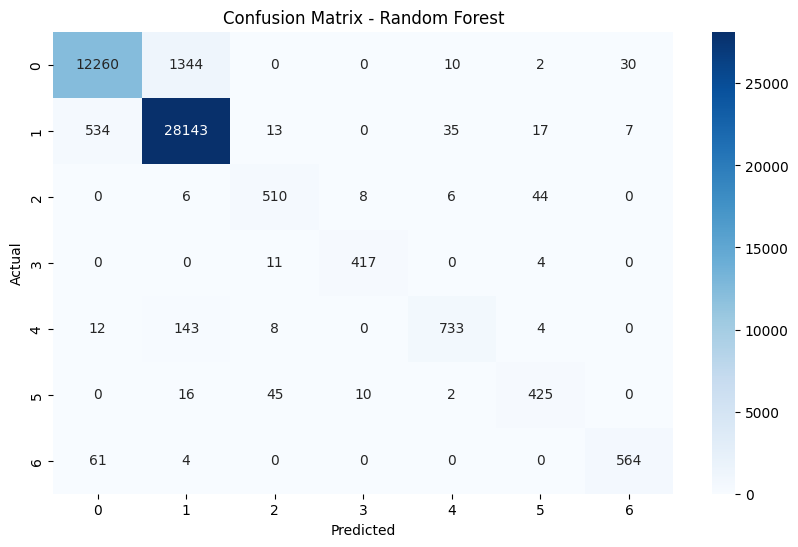

In [10]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Step 5: Feature Importance (Random Forest)

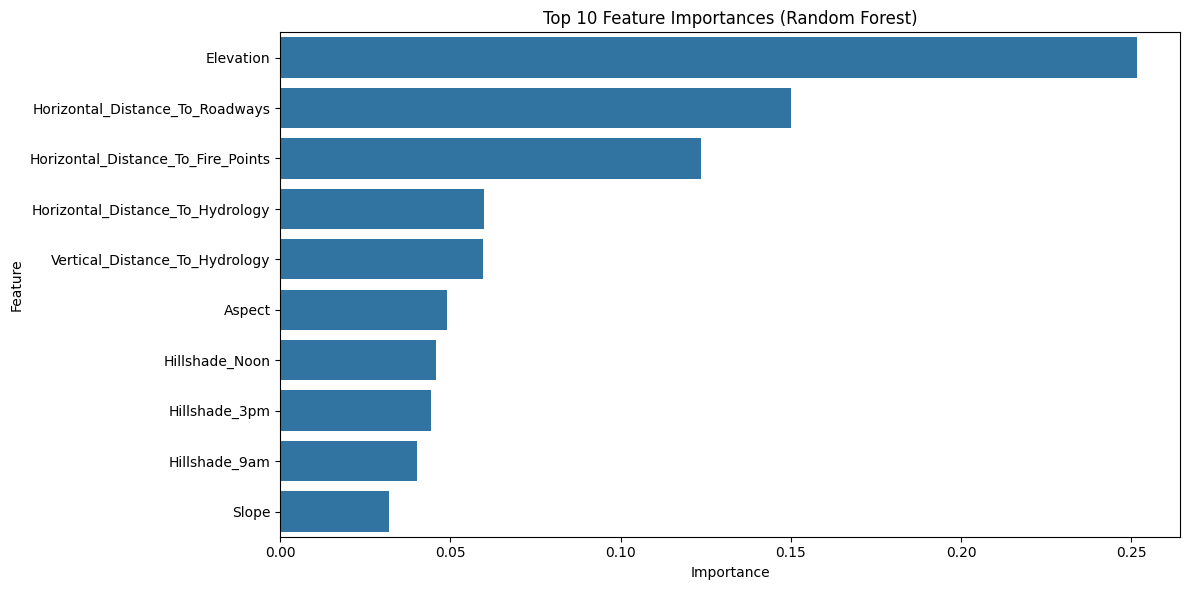

In [20]:
importances = rf_model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

## Bonus 1: XGBoost Model

In [13]:
!pip install xgboost --quiet

import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'multi:softmax',
    'num_class': 8,
    'eval_metric': 'mlogloss',
    'seed': 42
}
xgb_model = xgb.train(params, dtrain, num_boost_round=100)
y_pred_xgb = xgb_model.predict(dtest)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
               precision    recall  f1-score   support

         1.0       0.91      0.84      0.87     13646
         2.0       0.92      0.96      0.94     28749
         3.0       0.88      0.88      0.88       574
         4.0       0.98      0.96      0.97       432
         5.0       0.90      0.83      0.86       900
         6.0       0.84      0.88      0.86       498
         7.0       0.94      0.91      0.93       629

    accuracy                           0.92     45428
   macro avg       0.91      0.89      0.90     45428
weighted avg       0.92      0.92      0.92     45428



In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb # Import xgboost

# Evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Evaluate XGBoost model
dtest_eval = xgb.DMatrix(X_test) # Convert X_test to DMatrix
y_pred_xgb = xgb_model.predict(dtest_eval) # Predict using DMatrix
print("\nXGBoost Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb)) # Remove - 1
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb)) # Remove - 1
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb)) # Remove - 1

Random Forest Classifier Evaluation:
Accuracy: 0.9476974553139034

Confusion Matrix:
 [[12260  1344     0     0    10     2    30]
 [  534 28143    13     0    35    17     7]
 [    0     6   510     8     6    44     0]
 [    0     0    11   417     0     4     0]
 [   12   143     8     0   733     4     0]
 [    0    16    45    10     2   425     0]
 [   61     4     0     0     0     0   564]]

Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.90      0.92     13646
         2.0       0.95      0.98      0.96     28749
         3.0       0.87      0.89      0.88       574
         4.0       0.96      0.97      0.96       432
         5.0       0.93      0.81      0.87       900
         6.0       0.86      0.85      0.86       498
         7.0       0.94      0.90      0.92       629

    accuracy                           0.95     45428
   macro avg       0.92      0.90      0.91     45428
weighted avg       0.95      0.

## Bonus 1: Model Comparison

In [16]:
from sklearn.metrics import accuracy_score

acc_rf = accuracy_score(y_test, y_pred_rf)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(f"XGBoost Accuracy:      {acc_xgb:.4f}")

Random Forest Accuracy: 0.9477
XGBoost Accuracy:      0.9184


## Bonus 2: Hyperparameter Tuning (Random Forest)

Used to quickly tune model hyperparameters efficiently.
the original one was taking more then an hour to run.

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=2,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_rf.fit(X_train, y_train)
print("Best parameters:", grid_rf.best_params_)
print("Best accuracy:  ", grid_rf.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy:   0.9303112686287891


Bonus: Plot top 10 feature importances

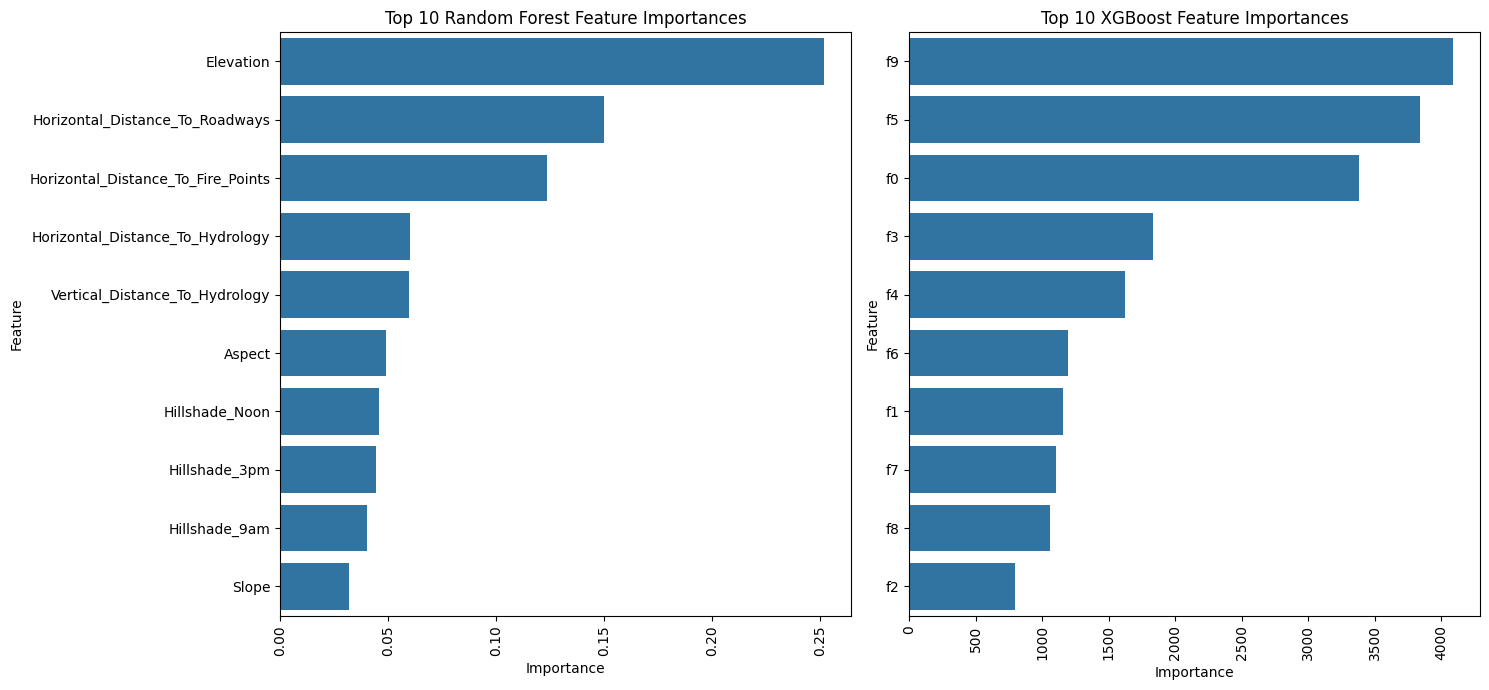

In [22]:
# Calculate and sort feature importances for XGBoost
xgb_importances = xgb_model.get_score(importance_type='weight')
xgb_feature_importance_df = pd.DataFrame({
    'Feature': list(xgb_importances.keys()),
    'Importance': list(xgb_importances.values())
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10))
plt.title('Top 10 Random Forest Feature Importances')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance_df.head(10))
plt.title('Top 10 XGBoost Feature Importances')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()